# **Cherry Blossom Data Modeling and Evaluating**

## Objectives

- Answer business requirement 2:

  > The client has expressed an interest in determining the presence of powdery mildew on a given leaf.

## Inputs

The output includes image shape embeddings stored as a pickle (.pkl) file, which contains the extracted representations of the images from the test, train, and validation folders, including their respective subfolders.

## Outputs

- Images Distribution Plot: A visualisation depicting the distribution of images across the train, validation, and test sets. This plot provides insights into the dataset's composition and the balance between the different sets.
- Label Distribution Bar Chart: A bar chart illustrating the distribution of labels in the dataset. This visualisation helps understand the frequency of different classes or categories present in the data.
- Set Distribution Pie Chart: A pie chart showcasing the distribution of images across the train, validation, and test sets. This chart presents the proportions or percentages of images in each set, giving a comprehensive overview of the dataset partition.
- Image Augmentation: An augmentation technique applied to the images, which involves performing various transformations such as rotation, scaling, or flipping. This process enhances the diversity of the dataset and helps improve model generalization.
- Augmented Images Plot: Plots showcasing the augmented images for each set, providing a visual representation of the transformations applied.
- Class Indices for Prediction Inference: Indices assigned to each class label to facilitate prediction inference in the output.
- Machine Learning Model Creation and Summary: The creation of a machine learning model specific to the task at hand. A summary of the model's architecture, including the number of parameters and layer configurations, is displayed.
- Model Training: The training of the machine learning model using the provided dataset. During this process, the model learns to make predictions based on the input data and the associated labels.
- Model Saving: The saved model is stored for future use or deployment in production environments.
Learning Curve Plot: A plot illustrating the model's performance over training epochs. This plot shows the trend of accuracy or loss metrics as the model learns from the training data.
- Model Evaluation: The evaluation of the trained model's performance using saved evaluation files. This includes calculations of accuracy, plotting of the ROC (Receiver Operating Characteristic) curve, and generation of a classification report.
- Classification Report: Detailed metrics and statistics summarizing the model's performance. This includes accuracy, precision, recall, and F1-score values, which can vary based on the specific model (Model A, Model B, or Model C).
- Confusion Matrix Plot: A visual representation of the confusion matrix, which displays the predicted labels versus the true labels. This plot helps identify any patterns or trends in misclassifications.
- Evaluation Results Saving: The saving of evaluation results, including accuracy, classification reports, and confusion matrix, in a pickle file format for future reference or analysis.
- Prediction on Random Image File: The model's prediction on a randomly selected image file, providing an example of the model's inference capabilities on unseen data.

## Additional Comments

- To meet the client's requirements and enhance data understanding, multiple versions of the data were plotted. These versions provided additional insights and catered to potential requests for deeper comprehension.

- The construction of the Convolutional Neural Network (CNN) prioritized achieving high accuracy while minimizing both loss and training time. The CNN architecture was meticulously designed to strike a balance between model size and performance. It was carefully kept as compact as possible without compromising accuracy or falling victim to overfitting.

- Further details regarding hyperparameter optimization, as well as an account of the trial and error phase, have been extensively documented in both the readme.md file. These resources provide in-depth analysis, explanations, and insights into the process of fine-tuning the model for optimal performance.



---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/kuro/Desktop/PP5 Project/pp5-mildew-detection-in-cherry-leaves/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
work_dir = os.getcwd()
work_dir

'/Users/kuro/Desktop/PP5 Project/pp5-mildew-detection-in-cherry-leaves'

---

## Set the input directories

The set, train, test and validation paths

In [4]:
my_data_dir = 'inputs/cherry-leaves-dataset/cherry-leaves'
train_path = my_data_dir + '/train' 
test_path = my_data_dir + '/test'
val_path = my_data_dir + '/validation'

## Set the output directory

In [5]:
version = 'v1'
file_path = f'outputs/{version}'

if os.path.exists(os.path.join(work_dir, 'outputs', version)):
    print('Old version is already available. Please create a new version.')
else:
    os.makedirs(file_path)

Old version is already available. Please create a new version.


## Set the label names

In [6]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['powdery_mildew', 'healthy']


## Set image shape

In [7]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

----

## Image Distribution

Counts the number of images per set and label

----

### Import the libraries

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from matplotlib.image import imread

In [10]:
import plotly.express as px

# Create an empty DataFrame to store frequency information
df_freq = pd.DataFrame([])

# Iterate over the folders ('train', 'test', 'validation') and labels
for folder in ['train', 'test', 'validation']:
    for label in labels:
        # Calculate the count of images in the specific folder and label
        count = len(os.listdir(my_data_dir + '/' + folder + '/' + label))

        # Append the frequency information to the DataFrame
        df_freq = pd.concat(
            [df_freq, pd.DataFrame(data={
                'Set': folder,
                'Label': label,
                'Count': [count]
                })]
            )

        # Print the count of images for the current folder and label
        print(f"* {folder} - {label}: {count} images")

print("\n")

* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* test - powdery_mildew: 422 images
* test - healthy: 422 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images




### Label Distribution - Bar Chart

In [11]:
# Create a bar chart using Plotly Express
fig = px.bar(
    df_freq,  # DataFrame containing the data
    x="Set",  # Specify the x-axis as 'Set' column in DataFrame
    y="Count",  # Specify the y-axis as 'Count' column in DataFrame
    color='Label',  # Color the bars based on 'Label' column
    title="Cherry Leaves Dataset",  # Set the chart title
    text_auto=True  # Enable automatic text placement on bars
)

# Customize the layout of the chart
fig.update_layout(
    autosize=False,  # Disable automatic sizing
    width=800,  # Set the width of the chart
    height=500  # Set the height of the chart
)

# Display the chart
fig.show()

# Save the chart as an image file
# fig.write_image(f'{file_path}/number_leaves_sets.png', format='png', engine='kaleido')
# I cannot get the line above to save the image for the life of me. This error just keeps
# coming up:
# ValueError: Failed to start Kaleido subprocess. Error stream:

### Set Distribution - Pie Chart

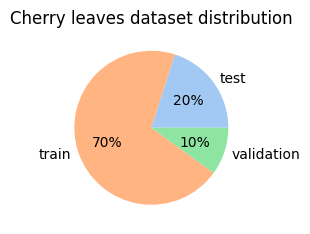

In [12]:
# Get the list of folders in the specified directory
folders = os.listdir(my_data_dir)

data = []  # List to store the counts of images per folder

# Iterate over each folder
for folder in folders:
    n = 0  # Variable to store the count of images for the current folder
    for label in labels:
        # Count the number of images in the folder and increment the total count
        n += len(os.listdir(my_data_dir + '/' + folder + '/' + label))
    data.append(n)  # Append the total count to the data list

# Set the figure size based on DPI
px = 1 / plt.rcParams['figure.dpi']
plt.subplots(figsize=(800*px, 250*px))

# Define colors for the pie chart
colors = sns.color_palette('pastel')[0:5]

# Create the pie chart
plt.pie(data, labels=folders, colors=colors, autopct='%.0f%%')
plt.title('Cherry leaves dataset distribution')

# Save the pie chart as an image file
plt.savefig(f'{file_path}/sets_distribution_pie.png', bbox_inches='tight', dpi=150)

# Display the pie chart
plt.show()

## Image data augmentation

### Import ImageDataGenerator

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Initialise ImageDataGenerator

### Setting the batch size

In [15]:
batch_size = 16

### Augment training image set

In [16]:
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot augmented training image set

(16, 256, 256, 3)


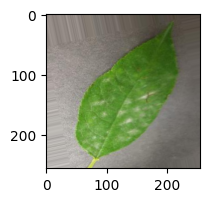

(16, 256, 256, 3)


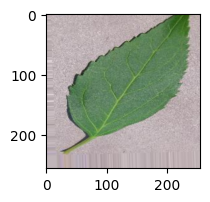

(16, 256, 256, 3)


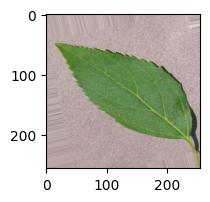

In [20]:
for _ in range(3):
    plt.figure(figsize=(2, 2))
    img, label = train_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()


### Augment validation image set

In [21]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='categorical',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot augmented validation image set

(16, 256, 256, 3)


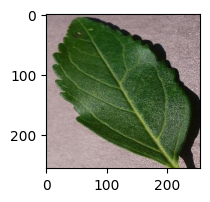

(16, 256, 256, 3)


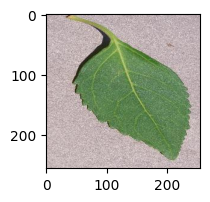

(16, 256, 256, 3)


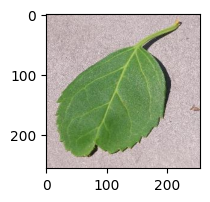

In [22]:
for _ in range(3):
    plt.figure(figsize=(2, 2))
    img, label = validation_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()

### Augment test image set

In [23]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='categorical',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
